# Numerical Selection

## Importing Libraries

In [14]:
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Loading Dataset

In [35]:
main_train=pd.read_csv('../Dataset/train_main.csv')

In [15]:
train_final1 = pd.read_csv('../Dataset/train_final1.csv')
train_final1

,Unnamed: 0,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,MasVnrType_None & BrkCmn,MasVnrType_Stone,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_noFireplace
0,0,1,60,65.0,8450,7,5,2003,2003,196.0,...,False,False,False,False,False,False,False,False,False,True
1,1,2,20,80.0,9600,6,8,1976,1976,0.0,...,True,False,False,False,False,False,False,False,True,False
2,2,3,60,68.0,11250,7,5,2001,2002,162.0,...,False,False,False,False,False,False,False,False,True,False
3,3,4,70,60.0,9550,7,5,1915,1970,0.0,...,True,False,False,True,False,False,True,False,False,False
4,4,5,60,84.0,14260,8,5,2000,2000,350.0,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,1456,60,62.0,7917,6,5,1999,2000,0.0,...,True,False,False,False,False,False,False,False,True,False
1456,1456,1457,20,85.0,13175,6,6,1978,1988,119.0,...,False,True,False,False,True,False,False,False,True,False
1457,1457,1458,70,66.0,9042,7,9,1941,2006,0.0,...,True,False,False,False,False,False,True,False,False,False
1458,1458,1459,20,68.0,9717,5,6,1950,1996,0.0,...,True,False,False,True,False,False,False,False,False,True


### Separating numerical features from Dataframe into numerical_features variable

In [52]:
numerical_features=train_final1.loc[:,'Id':'SalePrice-noSkew']
categorical_features=train_final1.loc[:,'ExterQual_Fa':]

In [53]:
categorical_features['Id']=train_final1['Id']

In [54]:
categorical_features=categorical_features[['Id']+[col for col in categorical_features.columns if col!='Id']]
categorical_features.to_csv('categorical_features.csv')

In [55]:
numerical_features.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice-noSkew
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.869608,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,12.024057
std,421.610009,42.300571,24.383532,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,0.399449
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,10.460271
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,11.775105
50%,730.500000,50.000000,69.234569,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,12.001512
75%,1095.250000,70.000000,81.363253,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,12.273736
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,13.534474


In [56]:
numerical_features

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice-noSkew
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,12.247699
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,12.109016
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,12.317171
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,11.849405
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,12.072547
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,12.254868
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,12.493133
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,11.864469


## Starting the Feature selection

In [57]:
correlation=numerical_features.corr()
correlation

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice-noSkew
Id,1.000000,0.011156,0.006853,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.017942
MSSubClass,0.011156,1.000000,-0.363127,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.073959
LotFrontage,0.006853,-0.363127,1.000000,0.361382,0.246335,-0.056061,0.105156,0.074453,0.193161,0.254325,...,0.114962,0.148895,0.046521,0.080822,0.044560,0.176258,-0.000215,0.014449,-0.005005,0.376290
LotArea,-0.033226,-0.139781,0.361382,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.257320
OverallQual,-0.028365,0.032628,0.246335,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.817185
OverallCond,0.012609,-0.059316,-0.056061,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.036868
YearBuilt,-0.012713,0.027850,0.105156,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.586570
YearRemodAdd,-0.021998,0.040581,0.074453,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.565608
MasVnrArea,-0.051071,0.023573,0.193161,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.426776
BsmtFinSF1,-0.005024,-0.069836,0.254325,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.372023


In [58]:
correlation[abs(correlation['SalePrice-noSkew'])>0.3]['SalePrice-noSkew']

LotFrontage         0.376290
OverallQual         0.817185
YearBuilt           0.586570
YearRemodAdd        0.565608
MasVnrArea          0.426776
BsmtFinSF1          0.372023
TotalBsmtSF         0.612134
1stFlrSF            0.596981
2ndFlrSF            0.319300
GrLivArea           0.700927
FullBath            0.594771
HalfBath            0.313982
TotRmsAbvGrd        0.534422
Fireplaces          0.489450
GarageYrBlt         0.568696
GarageCars          0.680625
GarageArea          0.650888
WoodDeckSF          0.334135
OpenPorchSF         0.321053
SalePrice-noSkew    1.000000
Name: SalePrice-noSkew, dtype: float64

In [59]:
selected_features=correlation[abs(correlation['SalePrice-noSkew'])>0.3]['SalePrice-noSkew'].index

## base on correlation i will keep OverallQual and GrLivArea and GarageCars and GarageArea

In [61]:
numerical_to_keep=numerical_features[['Id','OverallQual','GrLivArea','GarageCars','GarageArea','SalePrice-noSkew']]
numerical_to_keep

,Id,OverallQual,GrLivArea,GarageCars,GarageArea,SalePrice-noSkew
0,1,7,1710,2,548,12.247699
1,2,6,1262,2,460,12.109016
2,3,7,1786,2,608,12.317171
3,4,7,1717,3,642,11.849405
4,5,8,2198,3,836,12.429220
...,...,...,...,...,...,...
1455,1456,6,1647,2,460,12.072547
1456,1457,6,2073,2,500,12.254868
1457,1458,7,2340,1,252,12.493133
1458,1459,5,1078,1,240,11.864469


In [62]:
numerical_to_keep.corr()

,Id,OverallQual,GrLivArea,GarageCars,GarageArea,SalePrice-noSkew
Id,1.000000,-0.028365,0.008273,0.016570,0.017634,-0.017942
OverallQual,-0.028365,1.000000,0.593007,0.600671,0.562022,0.817185
GrLivArea,0.008273,0.593007,1.000000,0.467247,0.468997,0.700927
GarageCars,0.016570,0.600671,0.467247,1.000000,0.882475,0.680625
GarageArea,0.017634,0.562022,0.468997,0.882475,1.000000,0.650888
SalePrice-noSkew,-0.017942,0.817185,0.700927,0.680625,0.650888,1.000000


## ## Since GarageArea and GarageCars are more 0.88 correlated i will remove GarageCars

In [63]:
numerical_to_keep=numerical_to_keep.drop('GarageCars',axis=1)

In [64]:
numerical_to_keep

,Id,OverallQual,GrLivArea,GarageArea,SalePrice-noSkew
0,1,7,1710,548,12.247699
1,2,6,1262,460,12.109016
2,3,7,1786,608,12.317171
3,4,7,1717,642,11.849405
4,5,8,2198,836,12.429220
...,...,...,...,...,...
1455,1456,6,1647,460,12.072547
1456,1457,6,2073,500,12.254868
1457,1458,7,2340,252,12.493133
1458,1459,5,1078,240,11.864469


## Selecting Categorical features
i'll select 4 of them base on rank in anova which is included in anova_top_4.png 
features to keep=
ExterQual-KitchenQual-BsmtQual-GarageFinish

In [72]:
categorical_to_keep=categorical_features.filter(regex='Exter|Ki|Bsm|GarageFinish|Id')

In [73]:
categorical_to_keep

,Id,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_noBasement,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_noGarage
0,1,False,True,False,False,True,False,False,True,False,False,True,False,False
1,2,False,False,True,False,False,True,False,True,False,False,True,False,False
2,3,False,True,False,False,True,False,False,True,False,False,True,False,False
3,4,False,False,True,False,True,False,False,False,True,False,False,True,False
4,5,False,True,False,False,True,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,False,False,True,False,False,True,False,True,False,False,True,False,False
1456,1457,False,False,True,False,False,True,False,True,False,False,False,True,False
1457,1458,False,False,False,False,True,False,False,False,True,False,True,False,False
1458,1459,False,False,True,False,True,False,False,False,True,False,False,True,False


## showing the correaltion in heatmap matrix to seeing it better

In [76]:
cate_corr=categorical_to_keep.corr()

<Axes: >

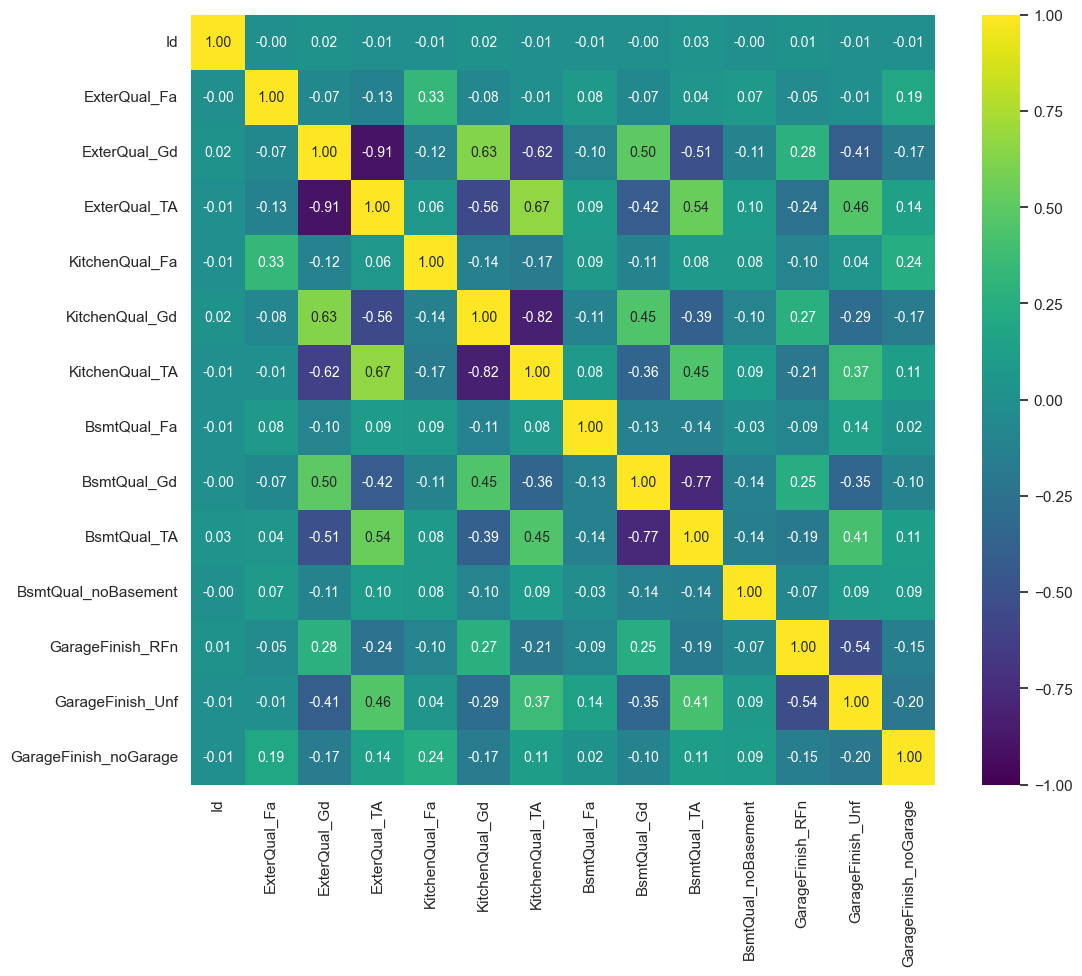

In [82]:
plt.figure(figsize=(12,10))
sns.heatmap(cate_corr,cmap='viridis', fmt=".2f", vmin=-1, vmax=1,cbar=True,annot_kws={"size": 10},annot=True) 

In [83]:
train_main['ExterQual'].value_counts()

ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: count, dtype: int64

## as i read about multicollinearity about dummy variables in same group i don't need to drop them if thy are correlated in same group because they represent mutually exclusive categories.

## merging numerical and categorical features

In [85]:
df_merged=categorical_to_keep.merge(numerical_to_keep,on='Id')
df_merged.to_csv('merged_to_keep_features.csv')